In [1]:
import pandas as pd
from sklearn import linear_model
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from lightgbm import LGBMRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import SGDRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
import numpy as np

In [2]:
import pandas as pd
train = pd.read_csv("Aug9ValidationFeaturization.csv")
train = train.rename(columns = {'textblob_subjectvities':'textblob_subjectivities'})
train = train.drop("Unnamed: 0", axis = 1)
df = pd.read_csv("Aug9TrainingFeaturizationUpdate.csv")
df = df.drop("Unnamed: 0", axis = 1)
train = pd.concat([train, df], axis = 0)
test = pd.read_csv("Aug11TestingFeaturization.csv")
test = test.drop("Unnamed: 0", axis = 1)

In [38]:
train.head()

,id,scaled_word_count,compound_sentiment_vader,neutral_sentiment_vader,textblob_polarities,textblob_subjectivities,sonar_hate_speech,sonar_offensive_language,sonar_neither,bert_feature_0,...,bert_feature_762,bert_feature_763,bert_feature_764,bert_feature_765,bert_feature_766,bert_feature_767,profanity_probability,ist_present,scaled_spelling_mistakes,score
0,2098cabe2c65f49b,-0.606036,0.0000,1.000,0.000000,0.000000,0.039453,0.330376,0.630171,-0.211861,...,0.075990,-0.573529,-0.346084,-0.071958,1.110351,0.372542,0.031756,0,0.002094,0.0
1,2099219c6525b2bb,-0.564958,0.0000,1.000,0.250000,0.500000,0.054796,0.390751,0.554454,0.234123,...,-0.811804,-0.659451,-0.415286,-0.687896,0.889668,-0.903292,0.075723,0,0.000000,0.0
2,209998f2281e9070,-0.123365,-0.2960,0.956,0.041975,0.208951,0.029579,0.391705,0.578716,-0.295592,...,0.245859,-0.517471,-0.030694,0.454757,0.643136,0.820966,0.012263,0,0.000000,0.0
3,209ad033f7f4e0ac,-0.493071,-0.4588,0.824,0.000000,0.000000,0.040465,0.240448,0.719086,-0.172126,...,0.497536,0.008248,-0.831731,-0.830045,0.526571,0.160221,0.014260,0,0.002094,0.0
4,209ad2fbd9273dbd,-0.564958,-0.3612,0.737,-0.041667,0.625000,0.046405,0.344609,0.608986,-0.256651,...,0.048683,-0.753143,0.125437,-0.755555,0.036813,0.426526,0.445231,1,0.000000,0.0


In [3]:
trainscores = np.array(train.score)
testscores = np.array(test.score)
train = train.drop(["id", "score"], axis = "columns")
test = test.drop(["id", "score"], axis = "columns")
train = train.values.tolist()
train = np.asarray(train)
test = test.values.tolist()
test = np.asarray(test)
train = train.astype(np.float32) 
test = test.astype(np.float32)
trainscores = trainscores.astype(np.float32)
testscores = testscores.astype(np.float32)

In [4]:
import matplotlib.pyplot as plt
def plot_results(predvals, actualvals):
    actualvalslist = list(actualvals)
    plt.scatter(actualvalslist, predvals)
    plt.ylabel("Predicted Value")
    plt.xlabel("Actual Value")
    ##plt.xlim(0, 1)
    plt.ylim(0, 1)
    plt.plot([0, 1], [0, 1])
    plt.show()

In [18]:
tweets = pd.read_csv('Aug11TweetsFeaturized.csv')
tweets = tweets.drop("Unnamed: 0", axis = 1)

tweets = tweets.values.tolist()
tweets = np.asarray(tweets)
tweets = tweets.astype(np.float32) 

Score -0.7539363561930261
MSE 0.028219936957515086


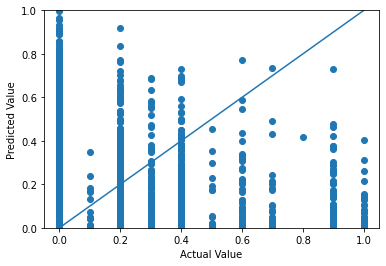

In [28]:
lgbm = LGBMRegressor()
lgbm.fit(train, trainscores)
print("Score", lgbm.score(test, testscores))
pred_vals = lgbm.predict(test)
print("MSE", mean_squared_error(testscores, pred_vals))
plot_results(pred_vals, testscores)

In [39]:
lgbmtweetspred = lgbm.predict(tweets)
lgbmtweets = pd.DataFrame()
lgbmtweets["scores"] = lgbmtweetspred
lgbmtweets.to_csv("LGBMPredictedTweets.csv")

In [27]:
sgd = SGDRegressor()
sgd.fit(train, trainscores)
print("Score", sgd.score(test, testscores))
pred_vals = sgd.predict(test)
print("MSE", mean_squared_error(testscores, pred_vals))
plot_results(pred_vals, testscores)

sgdtweetspred = sgd.predict(tweets)

sgdtweets = pd.DataFrame()
sgdtweets["scores"] = sgdtweetspred
sgdtweets.to_csv("SGDPredictedTweets.csv")

In [52]:
from sklearn.metrics import mean_absolute_error
print(mean_absolute_error(testscores, pred_vals))

0.07588345882532346


In [50]:
from sklearn.metrics import r2_score
r2_score(testscores, pred_vals)

-1.1865284010788373

In [51]:
adjr2 = 1-(1+1.1865284010788373)*(33533-1)/(33533-779-1)
print(adjr2)

-1.2385329693455738


In [53]:
import math
math.sqrt(0.03518012122640005)

0.18756364580163196

Score -0.8643001506672985
MSE 0.0299956338415321


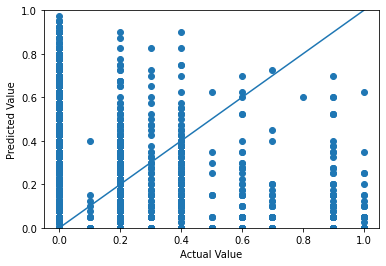

In [40]:
ranfor = RandomForestRegressor(n_estimators = 4)
ranfor.fit(train, trainscores)
print("Score", ranfor.score(test, testscores))
pred_vals = ranfor.predict(test)
print("MSE", mean_squared_error(testscores, pred_vals))
plot_results(pred_vals, testscores)

In [48]:
ranfortweetspred = ranfor.predict(tweets)

ranfortweets = pd.DataFrame()
ranfortweets["scores"] = ranfortweetspred
ranfortweets.to_csv("RandomForestTweets.csv")

Score -1.1865284010788373
MSE 0.03518012122640005


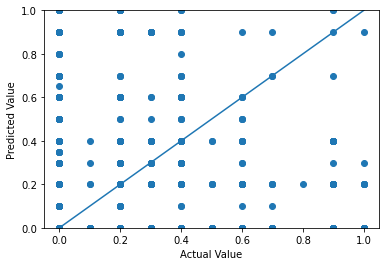

In [49]:
dectree = DecisionTreeRegressor()
dectree.fit(train, trainscores)
print("Score", dectree.score(test, testscores))
pred_vals = dectree.predict(test)
print("MSE", mean_squared_error(testscores, pred_vals))
plot_results(pred_vals, testscores)
dectreetweetspred = dectree.predict(tweets)
dectreetweets = pd.DataFrame()
dectreetweets["scores"] = dectreetweetspred
dectreetweets.to_csv("DecisionTreeTweets.csv")